In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img=cv2.imread("C:\Code\Sports Person Classifier\Model\Test Image\sachin test image3.jfif")
img.shape

(1381, 1200, 3)

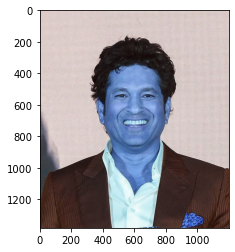

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1381, 1200)

In [6]:
gray

array([[193, 193, 197, ..., 194, 171, 155],
       [183, 188, 198, ..., 196, 180, 170],
       [166, 178, 197, ..., 201, 197, 196],
       ...,
       [ 36,  32,  25, ...,  38,  43,  44],
       [ 36,  32,  25, ...,  36,  42,  44],
       [ 36,  32,  25, ...,  36,  43,  46]], dtype=uint8)

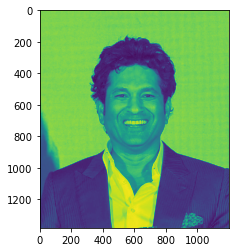

In [7]:
plt.imshow(gray)

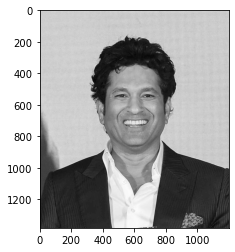

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[381, 369, 447, 447]])

In [10]:
(x,y,w,h)=faces[0]
x,y,w,h

(381, 369, 447, 447)

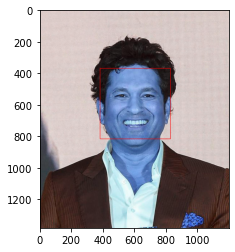

In [11]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

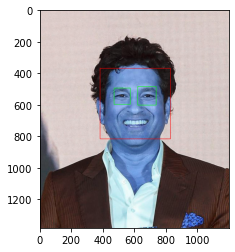

In [12]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

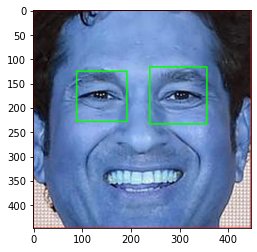

In [13]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return(roi_color)

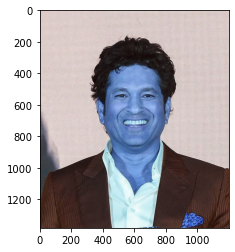

In [15]:
original_img=cv2.imread("C:\Code\Sports Person Classifier\Model\Test Image\sachin test image3.jfif")
plt.imshow(original_img)

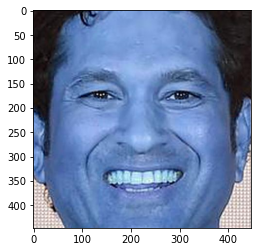

In [16]:
cropped_img=get_cropped_image_if_2_eyes("C:\Code\Sports Person Classifier\Model\Test Image\sachin test image3.jfif")
plt.imshow(cropped_img)

In [17]:
import os

In [18]:
pwd

'C:\\Users\\Vansh'

In [19]:
os.chdir('C:\\Users')

In [20]:
pwd

'C:\\Users'

In [21]:
os.chdir('C:\\')

In [22]:
pwd

'C:\\'

In [23]:
os.chdir('C:\Code\Sports Person Classifier\Model\dataset')

In [24]:
pwd

'C:\\Code\\Sports Person Classifier\\Model\\dataset'

In [25]:
path_to_data=cv2.imread("C:\Code\Sports Person Classifier\Model\Dataset")
path_to_cr_data=cv2.imread("C:\Code\Sports Person Classifier\Model\Dataset\Cropped")

In [26]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['.\\Cropped', '.\\M S Dhoni', '.\\Sachin Tendulkar', '.\\Virat Kohli']

In [28]:
path_to_cr_data=cv2.imread("C:\Code\Sports Person Classifier\Model\Dataset\Cropped")

In [29]:
import shutil

In [30]:
if os.path.exists("C:\Code\Sports Person Classifier\Model\Dataset\Cropped"):
    shutil.rmtree("C:\Code\Sports Person Classifier\Model\Dataset\Cropped")
os.mkdir("C:\Code\Sports Person Classifier\Model\Dataset\Cropped")

In [31]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder="C:\Code\Sports Person Classifier\Model\Dataset\Cropped"+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

.\Cropped
.\M S Dhoni
Generating cropped images in folder:  C:\Code\Sports Person Classifier\Model\Dataset\Cropped.\M S Dhoni
.\Sachin Tendulkar
Generating cropped images in folder:  C:\Code\Sports Person Classifier\Model\Dataset\Cropped.\Sachin Tendulkar
.\Virat Kohli
Generating cropped images in folder:  C:\Code\Sports Person Classifier\Model\Dataset\Cropped.\Virat Kohli


In [32]:
import numpy as np
import pywt
import cv2

In [33]:
def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255;
    
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

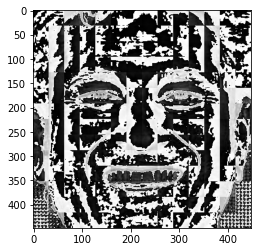

In [34]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [35]:
celebrity_file_names_dict

{'.\\Cropped': [],
 '.\\M S Dhoni': ['C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni1.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni2.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni3.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni4.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni5.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni6.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni7.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni8.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni9.png',
  'C:\\Code\\Sports Person Classifier\\Model\\Dataset\\Cropped.\\M S Dhoni/.\\M S Dhoni10.png',
  'C:\\Code\\S

In [36]:
class_dict={}
count=1
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'.\\Cropped': 1,
 '.\\M S Dhoni': 2,
 '.\\Sachin Tendulkar': 3,
 '.\\Virat Kohli': 4}

In [37]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [38]:
len(x)

97

In [39]:
len(x[0])

4096

In [40]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(97, 4096)

In [41]:
x[0]

array([  0.,   0.,   0., ..., 119., 119., 236.])

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.68

In [44]:
len(x_test)

25

In [45]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           2       0.70      0.70      0.70        10
           3       0.67      0.67      0.67         6
           4       0.67      0.67      0.67         9

    accuracy                           0.68        25
   macro avg       0.68      0.68      0.68        25
weighted avg       0.68      0.68      0.68        25



In [46]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [47]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [48]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.749524,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.599048,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.763810,{'logisticregression__C': 1}


In [49]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.68

In [50]:
best_estimators['random_forest'].score(x_test,y_test)

0.56

In [51]:
best_estimators['svm'].score(x_test,y_test)

0.76

In [56]:
best_clf=best_estimators['svm']

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[6, 3, 1],
       [1, 5, 0],
       [1, 0, 8]], dtype=int64)

In [58]:
import seaborn as sns

Text(51.0, 0.5, 'True')

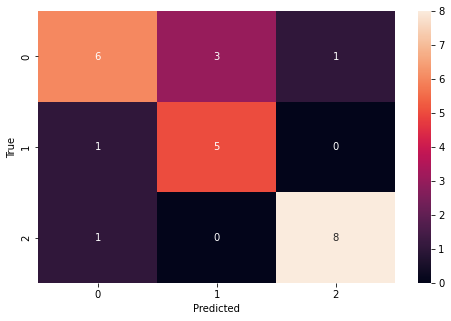

In [59]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')